In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#import beautiful soup
from urllib.request import urlopen
from bs4 import BeautifulSoup


print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [13]:
address = 'Clarke Quay, Singapore'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Clarke Quay are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinates of Clarke Quay are 1.2881865499999998, 103.84639555444176.


## FOURSQUARE PT 1

In [14]:
CLIENT_ID = 'TNIUY4ZSR4XFWD5X2NJYDGULNPVJPOI311ZDG52ZLXDJSKTR' # your Foursquare ID
CLIENT_SECRET = 'NT5ZWAQPRNSEY2S2ZQ4OG5KILMDTD0Q2PSGVYPPIKHXP2CWA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TNIUY4ZSR4XFWD5X2NJYDGULNPVJPOI311ZDG52ZLXDJSKTR
CLIENT_SECRET:NT5ZWAQPRNSEY2S2ZQ4OG5KILMDTD0Q2PSGVYPPIKHXP2CWA


## FOURSQUARE PT 2

In [15]:
LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=TNIUY4ZSR4XFWD5X2NJYDGULNPVJPOI311ZDG52ZLXDJSKTR&client_secret=NT5ZWAQPRNSEY2S2ZQ4OG5KILMDTD0Q2PSGVYPPIKHXP2CWA&v=20180605&ll=1.2881865499999998,103.84639555444176&radius=500&limit=200'

## FOURSQUARE PT 3

In [16]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee26c91710ec91695ab9683'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Singapore River',
  'headerFullLocation': 'Singapore River, Singapore',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 119,
  'suggestedBounds': {'ne': {'lat': 1.2926865545000044,
    'lng': 103.85088829238684},
   'sw': {'lat': 1.2836865454999953, 'lng': 103.84190281649667}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e0c4c961f6e9300e4e4f35b',
       'name': '28 HongKong Street',
       'location': {'address': '28 Hong Kong Street',
        'lat': 1.287737,
        'lng': 103.846934,
        'labeledLatLngs': [{'label': 'display',
          'lat'

## FOURSQUARE PART 4

In [17]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [18]:
#pull the actual data from the Foursquare API

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,venue.name,venue.id,venue.categories,venue.location.lat,venue.location.lng
0,28 HongKong Street,4e0c4c961f6e9300e4e4f35b,Cocktail Bar,1.287737,103.846934
1,FOC by Nandu Jubany,54103dbd498e9db793f05b47,Spanish Restaurant,1.287460,103.847503
2,Clarke Quay Riverside,4f29050be4b0abca0666bfc4,Waterfront,1.290060,103.846157
3,Clarke Quay,4b05880ef964a520d6ae22e3,Shopping Plaza,1.289893,103.845818
4,Shinzo Japanese Cuisine,5236ef9011d2a88886b4a0f9,Japanese Restaurant,1.288237,103.847677
5,nomVnom,56aa6e34498ed42196c9caf0,Vegetarian / Vegan Restaurant,1.288977,103.846930
6,Swissôtel Merchant Court,4b05880af964a520afad22e3,Hotel,1.288434,103.845674
7,Wine RVLT,59c0febe603d2a6b702a3214,Wine Shop,1.288104,103.847962
8,Singapore River,4b058810f964a5203eaf22e3,River,1.288998,103.846958
9,PARKROYAL COLLECTION,4ead4d820cd64b8eda097d6f,Hotel,1.285754,103.846169


In [19]:
#fix the column names so they look relatively normal

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,id,categories,lat,lng
0,28 HongKong Street,4e0c4c961f6e9300e4e4f35b,Cocktail Bar,1.287737,103.846934
1,FOC by Nandu Jubany,54103dbd498e9db793f05b47,Spanish Restaurant,1.287460,103.847503
2,Clarke Quay Riverside,4f29050be4b0abca0666bfc4,Waterfront,1.290060,103.846157
3,Clarke Quay,4b05880ef964a520d6ae22e3,Shopping Plaza,1.289893,103.845818
4,Shinzo Japanese Cuisine,5236ef9011d2a88886b4a0f9,Japanese Restaurant,1.288237,103.847677
5,nomVnom,56aa6e34498ed42196c9caf0,Vegetarian / Vegan Restaurant,1.288977,103.846930
6,Swissôtel Merchant Court,4b05880af964a520afad22e3,Hotel,1.288434,103.845674
7,Wine RVLT,59c0febe603d2a6b702a3214,Wine Shop,1.288104,103.847962
8,Singapore River,4b058810f964a5203eaf22e3,River,1.288998,103.846958
9,PARKROYAL COLLECTION,4ead4d820cd64b8eda097d6f,Hotel,1.285754,103.846169


In [20]:
# find a list of unique categories from the API so we can see what may or may not fit for restaurants

nearby_venues['categories'].unique()


array(['Cocktail Bar', 'Spanish Restaurant', 'Waterfront',
       'Shopping Plaza', 'Japanese Restaurant',
       'Vegetarian / Vegan Restaurant', 'Hotel', 'Wine Shop', 'River',
       'Thai Restaurant', 'Seafood Restaurant', 'Supermarket',
       'Yoga Studio', 'Hotel Bar', 'Soup Place', 'Gym', 'Bubble Tea Shop',
       'Mexican Restaurant', 'Brewery', 'Hotpot Restaurant', 'Lounge',
       'Massage Studio', 'Bistro', 'Nightclub', 'Donut Shop', 'Café',
       'Gym / Fitness Center', 'Italian Restaurant',
       'Vietnamese Restaurant', 'Noodle House',
       'Middle Eastern Restaurant', 'Bridge', 'Food Court', 'Gift Shop',
       'BBQ Joint', 'Dumpling Restaurant', 'Cosmetics Shop', 'Bar', 'Spa',
       'Hostel', 'Diner', 'American Restaurant', 'Wings Joint',
       'Ramen Restaurant', 'Salad Place', 'Miscellaneous Shop',
       'Juice Bar', 'Canal', 'Pub', 'Indian Restaurant',
       'Dim Sum Restaurant', 'Lighthouse', 'Bike Rental / Bike Share',
       'Clothing Store', 'Buffet', 'Th

In [21]:
# creating a list of categorie to remove from our dataframe because they are not restaurants
# I am sure there is a function that can be written to do this at scale but since it was a small list, I did it manually

removal_list = ['Waterfront','Shopping Plaza','Hotel', 'Wine Shop', 'River','Supermarket',
       'Yoga Studio','Gym', 'Bubble Tea Shop', 'Massage Studio','Donut Shop','Gym / Fitness Center','Bridge','Gift Shop','Cosmetics Shop', 'Spa','Hostel', 'Miscellaneous Shop', 'Canal','Lighthouse', 'Bike Rental / Bike Share',
       'Clothing Store','Theme Park Ride / Attraction',
       'Music Venue']

nearby_venues2 = nearby_venues.copy()


#getting a clear dataframe of just restaurants
nearby_venues2 = nearby_venues2[~nearby_venues2['categories'].isin(removal_list)]
nearby_venues2

,name,id,categories,lat,lng
0,28 HongKong Street,4e0c4c961f6e9300e4e4f35b,Cocktail Bar,1.287737,103.846934
1,FOC by Nandu Jubany,54103dbd498e9db793f05b47,Spanish Restaurant,1.287460,103.847503
4,Shinzo Japanese Cuisine,5236ef9011d2a88886b4a0f9,Japanese Restaurant,1.288237,103.847677
5,nomVnom,56aa6e34498ed42196c9caf0,Vegetarian / Vegan Restaurant,1.288977,103.846930
10,Un-Yang-Kor-Dai,5b2f272b8496ca002c9e2935,Thai Restaurant,1.287217,103.848307
11,Jumbo Seafood Restaurant,4b62be31f964a520fc502ae3,Seafood Restaurant,1.288983,103.844812
14,Orchid Club,512f2674e4b0bd85112b3321,Hotel Bar,1.285569,103.846394
15,Song Fa Bak Kut Teh 松发肉骨茶 (Song Fa Bak Kut Teh),4b336d63f964a5205b1925e3,Soup Place,1.288980,103.847693
16,Jumbo Seafood Gallery 珍宝海鮮樓 (Jumbo Seafood Gal...,4b8f902af964a5202a5833e3,Seafood Restaurant,1.289276,103.848288
20,Café Iguana,4b57f725f964a5207a4728e3,Mexican Restaurant,1.289006,103.844683


## FOURSQUARE PART 5

In [22]:
#let's get a list of venues

venue_id_list = nearby_venues2['id'].tolist()
venue_id_list

['4e0c4c961f6e9300e4e4f35b',
 '54103dbd498e9db793f05b47',
 '5236ef9011d2a88886b4a0f9',
 '56aa6e34498ed42196c9caf0',
 '5b2f272b8496ca002c9e2935',
 '4b62be31f964a520fc502ae3',
 '512f2674e4b0bd85112b3321',
 '4b336d63f964a5205b1925e3',
 '4b8f902af964a5202a5833e3',
 '4b57f725f964a5207a4728e3',
 '4b05880bf964a520f4ad22e3',
 '50ae28fde4b0062752d48b38',
 '4b3e0ebff964a520099825e3',
 '566ce157498ee8c21c2817e0',
 '57a5be48498e1c2e446b8cb8',
 '5389dc86498e636caebee652',
 '4bdc20f7f1499c74d66138f3',
 '5957baa58173cb5b6f24c323',
 '4e0ab9121838eeb16cbd0b5f',
 '4b05880cf964a5200eae22e3',
 '51f1348a7dd2877367af2dae',
 '549ab310498eafa422174302',
 '59033ecdb23dfa5f667d471e',
 '57d95b77498e258079175b5b',
 '54aa49f0498ee74ea1bf63e6',
 '4de9dd29c65be8091d96ce89',
 '537644d3498e42aa83af6509',
 '4e006d1e483bd352f71e17ab',
 '4bf010213a002d7f5c9d85a4',
 '54ba6454498e84e3e1580eeb',
 '50cce105ebcac1a1e18550bc',
 '594ff249396de02bf6bfe360',
 '4cc26203306e224b0141906c',
 '54377843498e0a3393581c16',
 '561e751d498e

In [23]:
#set up to pull the likes from the API based on venue ID

url_list = []
like_list = []
json_list = []

for i in venue_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)

[367, 128, 43, 32, 6, 370, 15, 499, 308, 98, 352, 311, 101, 61, 16, 98, 14, 8, 53, 548, 48, 97, 35, 20, 6, 35, 6, 7, 258, 14, 109, 22, 5, 43, 18, 43, 5, 9, 87, 8, 37, 24, 5, 15, 26, 5, 12, 7, 83, 6, 13, 6, 11, 51, 21, 5, 39, 48, 9, 69, 7, 9, 8, 37, 8, 3, 8]


In [24]:
#double check that we did not lose any venues based on if likes were available

print(len(like_list))
print(len(venue_id_list))

67
67


## DATA PREPARATION STAGE 1

In [27]:
#let's make a copy of our initial dataframe just in case anything goes wrong

clarke_quay_venues = nearby_venues2.copy()
clarke_quay_venues.head()

,name,id,categories,lat,lng
0,28 HongKong Street,4e0c4c961f6e9300e4e4f35b,Cocktail Bar,1.287737,103.846934
1,FOC by Nandu Jubany,54103dbd498e9db793f05b47,Spanish Restaurant,1.287460,103.847503
4,Shinzo Japanese Cuisine,5236ef9011d2a88886b4a0f9,Japanese Restaurant,1.288237,103.847677
5,nomVnom,56aa6e34498ed42196c9caf0,Vegetarian / Vegan Restaurant,1.288977,103.846930
10,Un-Yang-Kor-Dai,5b2f272b8496ca002c9e2935,Thai Restaurant,1.287217,103.848307


## DATA PREPARATION STAGE 2

In [28]:
# add in the list of likes

clarke_quay_venues['total likes'] = like_list
clarke_quay_venues.head()

,name,id,categories,lat,lng,total likes
0,28 HongKong Street,4e0c4c961f6e9300e4e4f35b,Cocktail Bar,1.287737,103.846934,367
1,FOC by Nandu Jubany,54103dbd498e9db793f05b47,Spanish Restaurant,1.287460,103.847503,128
4,Shinzo Japanese Cuisine,5236ef9011d2a88886b4a0f9,Japanese Restaurant,1.288237,103.847677,43
5,nomVnom,56aa6e34498ed42196c9caf0,Vegetarian / Vegan Restaurant,1.288977,103.846930,32
10,Un-Yang-Kor-Dai,5b2f272b8496ca002c9e2935,Thai Restaurant,1.287217,103.848307,6


## DATA PREPARATION STAGE 3

In [29]:
# now let's bin total likes

print(clarke_quay_venues['total likes'].max())
print(clarke_quay_venues['total likes'].min())
print(clarke_quay_venues['total likes'].median())
print(clarke_quay_venues['total likes'].mean())

548
3
22.0
72.76119402985074


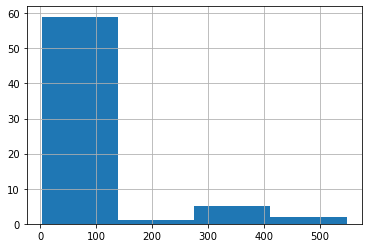

In [31]:
# let's visualize our total likes based on a histogram

import matplotlib.pyplot as plt
clarke_quay_venues['total likes'].hist(bins=4)
plt.show()

In [32]:
# what are the bins we want to use?

print(np.percentile(clarke_quay_venues['total likes'], 25))
print(np.percentile(clarke_quay_venues['total likes'], 50))
print(np.percentile(clarke_quay_venues['total likes'], 75))

8.0
22.0
65.0


In [33]:
# now we have our bin values so let's set them to the appropriate values
# less than 24, 24-45, 45-76, 76>
# poor, below avg, abv avg, great

poor = clarke_quay_venues['total likes']<=24
below_avg = clarke_quay_venues[(clarke_quay_venues['total likes']>24) & (clarke_quay_venues['total likes']<=45)]
abv_avg = clarke_quay_venues[(clarke_quay_venues['total likes']>45) & (clarke_quay_venues['total likes']<=76)]
great = clarke_quay_venues['total likes']>76

In [34]:
# let's set up a function that will re-categorize our restaurants based on likes

def conditions(s):
    if s['total likes']<=24:
        return 'poor'
    if s['total likes']<=45:
        return 'below avg'
    if s['total likes']<=76:
        return 'avg avg'
    if s['total likes']>76:
        return 'great'

clarke_quay_venues['total likes_cat']=clarke_quay_venues.apply(conditions, axis=1)

clarke_quay_venues

,name,id,categories,lat,lng,total likes,total likes_cat
0,28 HongKong Street,4e0c4c961f6e9300e4e4f35b,Cocktail Bar,1.287737,103.846934,367,great
1,FOC by Nandu Jubany,54103dbd498e9db793f05b47,Spanish Restaurant,1.287460,103.847503,128,great
4,Shinzo Japanese Cuisine,5236ef9011d2a88886b4a0f9,Japanese Restaurant,1.288237,103.847677,43,below avg
5,nomVnom,56aa6e34498ed42196c9caf0,Vegetarian / Vegan Restaurant,1.288977,103.846930,32,below avg
10,Un-Yang-Kor-Dai,5b2f272b8496ca002c9e2935,Thai Restaurant,1.287217,103.848307,6,poor
11,Jumbo Seafood Restaurant,4b62be31f964a520fc502ae3,Seafood Restaurant,1.288983,103.844812,370,great
14,Orchid Club,512f2674e4b0bd85112b3321,Hotel Bar,1.285569,103.846394,15,poor
15,Song Fa Bak Kut Teh 松发肉骨茶 (Song Fa Bak Kut Teh),4b336d63f964a5205b1925e3,Soup Place,1.288980,103.847693,499,great
16,Jumbo Seafood Gallery 珍宝海鮮樓 (Jumbo Seafood Gal...,4b8f902af964a5202a5833e3,Seafood Restaurant,1.289276,103.848288,308,great
20,Café Iguana,4b57f725f964a5207a4728e3,Mexican Restaurant,1.289006,103.844683,98,great


In [35]:
clarke_quay_venues['categories'].unique()


array(['Cocktail Bar', 'Spanish Restaurant', 'Japanese Restaurant',
       'Vegetarian / Vegan Restaurant', 'Thai Restaurant',
       'Seafood Restaurant', 'Hotel Bar', 'Soup Place',
       'Mexican Restaurant', 'Brewery', 'Hotpot Restaurant', 'Lounge',
       'Bistro', 'Nightclub', 'Café', 'Italian Restaurant',
       'Vietnamese Restaurant', 'Noodle House',
       'Middle Eastern Restaurant', 'Food Court', 'BBQ Joint',
       'Dumpling Restaurant', 'Bar', 'Diner', 'American Restaurant',
       'Wings Joint', 'Ramen Restaurant', 'Salad Place', 'Juice Bar',
       'Pub', 'Indian Restaurant', 'Dim Sum Restaurant', 'Buffet',
       'Ice Cream Shop'], dtype=object)

In [39]:
# let's create our new categories and create a function to apply those to our existing data


Bars = ['Pub', 'Cocktail Bar', 'Bar','Hotel Bar','Brewery','Lounge','Nightclub']
East_Asian_food = ['Hotpot Restaurant','Noodle House','Dumpling Restaurant','Dim Sum Restaurant','Japanese Restaurant','Ramen Restaurant']
Western_food = ['Spanish Restaurant','Italian Restaurant', 'Mexican Restaurant','Bistro','BBQ Joint','American Restaurant','Wings Joint','Diner']
South_SE_Asian_food = ['Seafood Restaurant','Thai Restaurant','Vietnamese Restaurant','Indian Restaurant','Buffet']
Other = ['Vegetarian / Vegan Restaurant','Soup Place', 'Café','Middle Eastern Restaurant', 'Food Court','Salad Place','Juice Bar','Ice Cream Shop']

def conditions2(s):
    if s['categories'] in Bars:
        return 'Bars'
    if s['categories'] in East_Asian_food :
        return 'East Asian food '
    if s['categories'] in Western_food:
        return 'Western_food'
    if s['categories'] in South_SE_Asian_food:
        return 'South_SE_Asian_food'
    if s['categories'] in Other:
        return 'Other'
    
clarke_quay_venues['categories_new']=clarke_quay_venues.apply(conditions2, axis=1)

In [40]:
clarke_quay_venues

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new
0,28 HongKong Street,4e0c4c961f6e9300e4e4f35b,Cocktail Bar,1.287737,103.846934,367,great,Bars
1,FOC by Nandu Jubany,54103dbd498e9db793f05b47,Spanish Restaurant,1.287460,103.847503,128,great,Western_food
4,Shinzo Japanese Cuisine,5236ef9011d2a88886b4a0f9,Japanese Restaurant,1.288237,103.847677,43,below avg,East Asian food
5,nomVnom,56aa6e34498ed42196c9caf0,Vegetarian / Vegan Restaurant,1.288977,103.846930,32,below avg,Other
10,Un-Yang-Kor-Dai,5b2f272b8496ca002c9e2935,Thai Restaurant,1.287217,103.848307,6,poor,South_SE_Asian_food
11,Jumbo Seafood Restaurant,4b62be31f964a520fc502ae3,Seafood Restaurant,1.288983,103.844812,370,great,South_SE_Asian_food
14,Orchid Club,512f2674e4b0bd85112b3321,Hotel Bar,1.285569,103.846394,15,poor,Bars
15,Song Fa Bak Kut Teh 松发肉骨茶 (Song Fa Bak Kut Teh),4b336d63f964a5205b1925e3,Soup Place,1.288980,103.847693,499,great,Other
16,Jumbo Seafood Gallery 珍宝海鮮樓 (Jumbo Seafood Gal...,4b8f902af964a5202a5833e3,Seafood Restaurant,1.289276,103.848288,308,great,South_SE_Asian_food
20,Café Iguana,4b57f725f964a5207a4728e3,Mexican Restaurant,1.289006,103.844683,98,great,Western_food


## DATA PREPARATION STAGE 4

In [41]:
clarke_quay_onehot = pd.get_dummies(clarke_quay_venues[['categories_new', 'total likes_cat']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
clarke_quay_onehot['Name'] = clarke_quay_venues['name'] 

# move neighborhood column to the first column
fixed_columns = [clarke_quay_onehot.columns[-1]] + list(clarke_quay_onehot.columns[:-1])
clarke_quay_onehot = clarke_quay_onehot[fixed_columns]

clarke_quay_onehot.head()

,Name,Bars,East Asian food,Other,South_SE_Asian_food,Western_food,avg avg,below avg,great,poor
0,28 HongKong Street,1,0,0,0,0,0,0,1,0
1,FOC by Nandu Jubany,0,0,0,0,1,0,0,1,0
4,Shinzo Japanese Cuisine,0,1,0,0,0,0,1,0,0
5,nomVnom,0,0,1,0,0,0,1,0,0
10,Un-Yang-Kor-Dai,0,0,0,1,0,0,0,0,1


## CLUSTER PART 1

In [51]:
cluster_df = clarke_quay_onehot.drop('Name', axis=1)

k_clusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(cluster_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 1, 1, 0, 2, 3, 2, 2, 2], dtype=int32)

## CLUSTER PART 2

In [43]:
clarke_quay_venues['label'] = kmeans.labels_
clarke_quay_venues.head()

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
0,28 HongKong Street,4e0c4c961f6e9300e4e4f35b,Cocktail Bar,1.287737,103.846934,367,great,Bars,2
1,FOC by Nandu Jubany,54103dbd498e9db793f05b47,Spanish Restaurant,1.287460,103.847503,128,great,Western_food,2
4,Shinzo Japanese Cuisine,5236ef9011d2a88886b4a0f9,Japanese Restaurant,1.288237,103.847677,43,below avg,East Asian food,1
5,nomVnom,56aa6e34498ed42196c9caf0,Vegetarian / Vegan Restaurant,1.288977,103.846930,32,below avg,Other,1
10,Un-Yang-Kor-Dai,5b2f272b8496ca002c9e2935,Thai Restaurant,1.287217,103.848307,6,poor,South_SE_Asian_food,0


## CLUSTER PART 3

In [44]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(clarke_quay_venues['lat'], clarke_quay_venues['lng'], clarke_quay_venues['name'], clarke_quay_venues['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## CLUSTER PART 4 : ANALYSIS

### CLUSTER 1

These venues are largely Western fast-food type places, or small Asian restaurants. Nothing fancy, mostly poor reviews.

In [52]:
clarke_quay_venues.loc[clarke_quay_venues['label']==0]


,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
10,Un-Yang-Kor-Dai,5b2f272b8496ca002c9e2935,Thai Restaurant,1.287217,103.848307,6,poor,South_SE_Asian_food,0
32,Yatagarasu 八咫鳥,5957baa58173cb5b6f24c323,Japanese Restaurant,1.286550,103.848900,8,poor,East Asian food,0
40,Braci,57d95b77498e258079175b5b,Italian Restaurant,1.287107,103.849257,20,poor,Western_food,0
42,Saigon Baguette,54aa49f0498ee74ea1bf63e6,Vietnamese Restaurant,1.288421,103.846711,6,poor,South_SE_Asian_food,0
44,Shiraz Mazzeh,537644d3498e42aa83af6509,Middle Eastern Restaurant,1.289810,103.845265,6,poor,Other,0
46,Basement Foodcourt,4e006d1e483bd352f71e17ab,Food Court,1.285941,103.844239,7,poor,Other,0
50,YAKINIQUEST,54ba6454498e84e3e1580eeb,BBQ Joint,1.286859,103.849490,14,poor,Western_food,0
53,Lee Kheong Roasted Delicacy,4cc26203306e224b0141906c,BBQ Joint,1.285261,103.845861,5,poor,Western_food,0
60,Astons Specialities,58e480b9ebf02807d9a6e4c4,American Restaurant,1.289154,103.846456,5,poor,Western_food,0
61,Chir Chir,5661a546498eb28732260135,Wings Joint,1.285775,103.845080,9,poor,Western_food,0


### CLUSTER 2

This cluster tends to be places catering to more niche tastes. Most places falling under 'other' are in here.

In [47]:
clarke_quay_venues.loc[clarke_quay_venues['label']==1]


,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
4,Shinzo Japanese Cuisine,5236ef9011d2a88886b4a0f9,Japanese Restaurant,1.288237,103.847677,43,below avg,East Asian food,1
5,nomVnom,56aa6e34498ed42196c9caf0,Vegetarian / Vegan Restaurant,1.288977,103.846930,32,below avg,Other,1
25,PUNCH,566ce157498ee8c21c2817e0,Bistro,1.286830,103.847360,61,avg avg,Western_food,1
33,Annalakshmi,4e0ab9121838eeb16cbd0b5f,Vegetarian / Vegan Restaurant,1.288414,103.843472,53,avg avg,Other,1
37,Craftsmen Specialty Coffee,59033ecdb23dfa5f667d471e,Café,1.288444,103.846703,35,below avg,Other,1
43,Outram Park Fried Kway Teow Mee,4de9dd29c65be8091d96ce89,Noodle House,1.285446,103.845922,35,below avg,East Asian food,1
55,Hero's,54377843498e0a3393581c16,Bar,1.286530,103.849079,43,below avg,Bars,1
59,Shuffle Music Bistro Bar,4e6081e81495676d54e3eefa,Diner,1.289489,103.845972,43,below avg,Western_food,1
65,Koji Sushi Bar,5462d934498ebf35eb104b62,Japanese Restaurant,1.284441,103.847052,37,below avg,East Asian food,1
70,Fill a Pita,51bfe709498ecb98e5b88c93,Middle Eastern Restaurant,1.284031,103.847624,26,below avg,Other,1


### CLUSTER 3

High quality sit-down restaurants for the most part, favouring no particular cuisine.

In [48]:
clarke_quay_venues.loc[clarke_quay_venues['label']==2]


,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
0,28 HongKong Street,4e0c4c961f6e9300e4e4f35b,Cocktail Bar,1.287737,103.846934,367,great,Bars,2
1,FOC by Nandu Jubany,54103dbd498e9db793f05b47,Spanish Restaurant,1.287460,103.847503,128,great,Western_food,2
11,Jumbo Seafood Restaurant,4b62be31f964a520fc502ae3,Seafood Restaurant,1.288983,103.844812,370,great,South_SE_Asian_food,2
15,Song Fa Bak Kut Teh 松发肉骨茶 (Song Fa Bak Kut Teh),4b336d63f964a5205b1925e3,Soup Place,1.288980,103.847693,499,great,Other,2
16,Jumbo Seafood Gallery 珍宝海鮮樓 (Jumbo Seafood Gal...,4b8f902af964a5202a5833e3,Seafood Restaurant,1.289276,103.848288,308,great,South_SE_Asian_food,2
20,Café Iguana,4b57f725f964a5207a4728e3,Mexican Restaurant,1.289006,103.844683,98,great,Western_food,2
21,Brewerkz Restaurant & Microbrewery,4b05880bf964a520f4ad22e3,Brewery,1.289527,103.844098,352,great,Bars,2
22,Hai Di Lao Hot Pot,50ae28fde4b0062752d48b38,Hotpot Restaurant,1.289798,103.845552,311,great,East Asian food,2
23,Le Noir,4b3e0ebff964a520099825e3,Lounge,1.289882,103.846299,101,great,Bars,2
27,Southbridge,5389dc86498e636caebee652,Bistro,1.288417,103.849223,98,great,Western_food,2


### CLUSTER 4

Poorly-rated bars and clubs.

In [49]:
clarke_quay_venues.loc[clarke_quay_venues['label']==3]


,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
14,Orchid Club,512f2674e4b0bd85112b3321,Hotel Bar,1.285569,103.846394,15,poor,Bars,3
26,Headquarters,57a5be48498e1c2e446b8cb8,Nightclub,1.287723,103.849381,16,poor,Bars,3
29,Club V3 - Live On Stage,4bdc20f7f1499c74d66138f3,Nightclub,1.286953,103.848022,14,poor,Bars,3
35,Ah Sam Cold Drink Stall,51f1348a7dd2877367af2dae,Cocktail Bar,1.287497,103.849302,48,avg avg,Bars,3
52,Get Juiced,594ff249396de02bf6bfe360,Lounge,1.289887,103.846469,22,poor,Bars,3
56,Club illusion,561e751d498ec2dfc6ce2f1a,Nightclub,1.289533,103.845131,18,poor,Bars,3
64,Aquanova @ Clarke Quay,4fd36f2ee4b0191b9be98360,Bar,1.290472,103.845541,8,poor,Bars,3
73,Neverland Clarke Quay,57d6ba72498e4af69dde86dd,Nightclub,1.290418,103.845493,12,poor,Bars,3
74,GONG,552e5232498ec447a4871518,Bar,1.287008,103.848872,7,poor,Bars,3
87,The Chupitos Bar,4c74dcb7ff1fb60cf898f4a7,Bar,1.290546,103.844919,48,avg avg,Bars,3
